In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('scrapped_data.csv')

In [4]:
df.head()

,vacancy_id,company,description,schedule,city,salary
0,7593265,SmartTender,<p><b>SmartTender</b> - швидко зростаюча проду...,полная занятость,Киев,0
1,6118569,"Мультиметод, ООО",<p>Международная школа восстановительной медиц...,полная занятость,Киев,20000
2,5148817,m1-shop.ru,<p>Компания M1-SHOP - рекламная сеть с одним и...,удаленная работа,Киев,10300
3,6340282,Decathlon,"<p>Decathlon (international sports company, #1...",полная занятость,Киев,0
4,7505442,OPEN DATA SCIENCE LLC,<p>The <u>Open Data Science</u> Conference (OD...,полная занятость,Львов,0


In [5]:
df.salary.value_counts()[:5]  # 0 is indicator of no salary specified, replace with NaN

0        3344
15000     412
10000     335
20000     217
12000     203
Name: salary, dtype: int64

In [6]:
df.salary[df.salary == 0] = np.nan

/Users/ptyshevs/py_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
import matplotlib.pyplot as plt

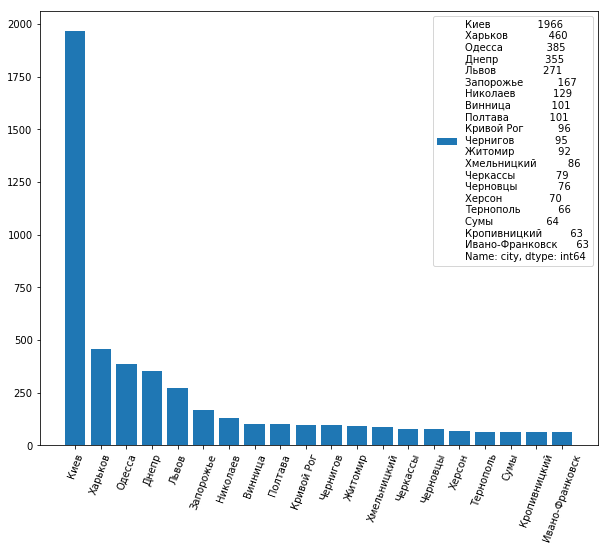

In [8]:
values = df.city.value_counts()[:20]
plt.figure(figsize=(10,8))
plt.bar(values.index, values, label=values)
plt.xticks(rotation=70)
plt.legend();

In [9]:
df.schedule.value_counts()

полная занятость                5495
повна зайнятість                 188
удаленная работа                 120
неполная занятость               104
","vacancy_ExperienceName":"      77
full-time                         11
стажировка / практика              2
проектная работа                   2
неповна зайнятість                 1
Name: schedule, dtype: int64

In [10]:
df.schedule[(df.schedule == 'повна зайнятість') | (df.schedule == 'full-time')] = 'полная занятость'
df.schedule[df.schedule == '","vacancy_ExperienceName":"'] = np.nan
df.schedule = df.schedule.apply(lambda x: 'other' if x not in ['полная занятость', 'удаленная работа', 'неполная занятость'] and not pd.isnull(x) else x)
df.schedule.fillna(method='ffill', inplace=True)  # cannot use mode :(

/Users/ptyshevs/py_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ptyshevs/py_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


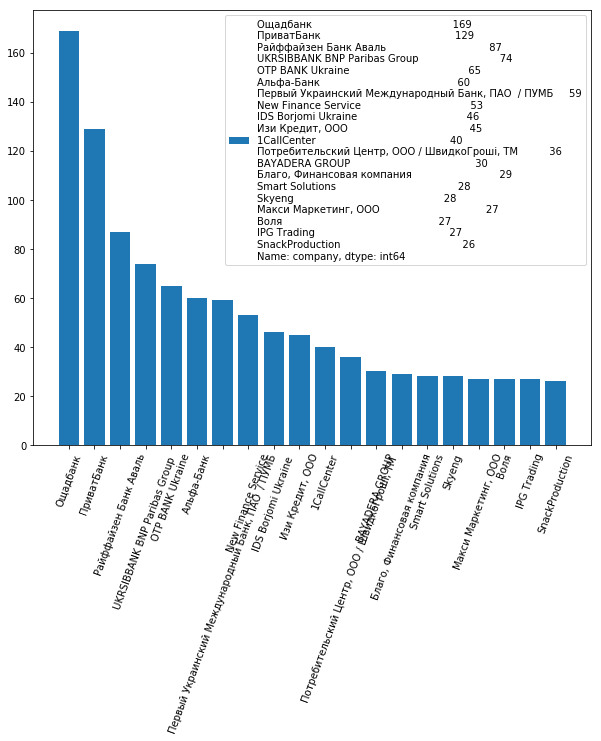

In [11]:
plt.figure(figsize=(10,8))
values = df.company.value_counts()[:20]
plt.bar(values.index, values, label=values)
plt.xticks(rotation=70)
plt.legend();

In [12]:
df.description = df.description.apply(lambda x: x.lower().strip())

In [13]:
import re

In [14]:
df.description = df.description.apply(lambda x: re.sub('&nbsp;', ' ', re.sub('<.+?>', ' ', x)))

In [52]:
df[df.salary != 0].groupby('city').salary.agg([np.nanmean]).nanmean.sort_values(ascending=False).dropna().head(n=25)

city
Другие страны       25000.000000
Оржица              25000.000000
Глобино             25000.000000
Хорол               25000.000000
Запоріжжя           25000.000000
Івано-Франківськ    23000.000000
Рубежное            22766.666667
Виноградов          20500.000000
Лисичанск           20150.000000
Белозерка           20000.000000
Кривий Ріг          20000.000000
Киев                17841.940816
Северодонецк        17333.333333
Обухов              16875.000000
Мукачево            16601.818182
Львів               16500.000000
Червоноград         16000.000000
Лубны               15666.666667
Вишневое            15666.666667
Ковель              15666.666667
Донецк              15350.000000
Гайсин              15000.000000
Крым                15000.000000
Симферополь         15000.000000
Черноморск          15000.000000
Name: nanmean, dtype: float64

In [155]:
df.to_csv('cleaned_data.csv', index=False)